**Binary Classifier for Breast-Cancer Diagnosis.**

*   Malignant (1)
*   Benign (-1)





In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

In [26]:
df = load_breast_cancer()
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [27]:
X = df.data
y = df.target
print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)


Shape of features (X): (569, 30)
Shape of target variable (y): (569,)


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)




*   Here we implement Single Layer Perceptron Model



In [30]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def train(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_epochs):
            for i in range(n_samples):
                y_pred = self.predict(X_train[i])
                error = y_train[i] - y_pred
                self.weights += self.learning_rate * error * X_train[i]
                self.bias += self.learning_rate * error

    def predict(self, x):
        linear_output = np.dot(self.weights, x) + self.bias
        return 1 if linear_output >= 0 else -1

Training the perceptron model using gradient descent. Decision Boundary Plotting for each weight update iteration

<ipython-input-31-653c13235fda>:33: RuntimeWarning: invalid value encountered in double_scalars
  slope = -weights[0] / weights[1]
<ipython-input-31-653c13235fda>:34: RuntimeWarning: invalid value encountered in double_scalars
  intercept = -bias / weights[1]


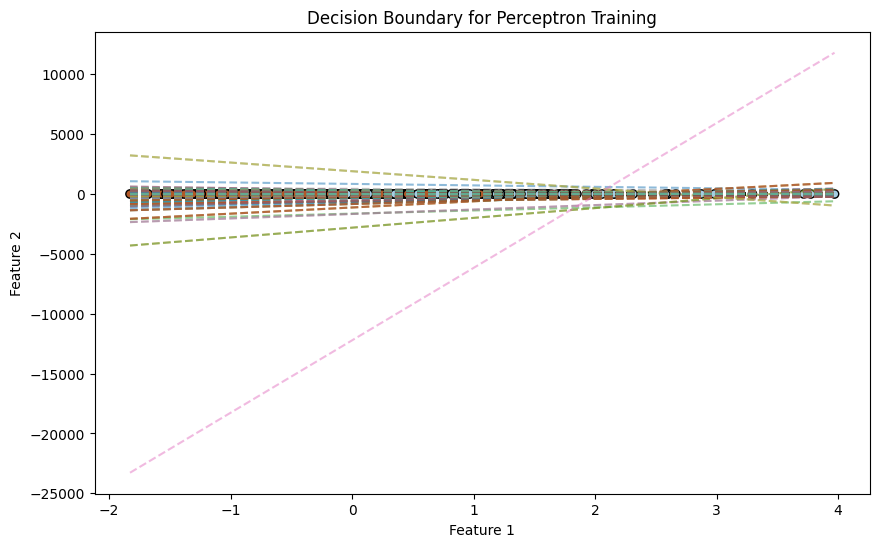

In [31]:

class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None
        self.decision_boundaries = []

    def train(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_epochs):
            for i in range(n_samples):
                y_pred = self.predict(X_train[i])
                error = y_train[i] - y_pred
                self.weights += self.learning_rate * error * X_train[i]
                self.bias += self.learning_rate * error

                # here we have to store weights and bias for decision boundary plot
                self.decision_boundaries.append((self.weights.copy(), self.bias))

    def predict(self, x):
        linear_output = np.dot(self.weights, x) + self.bias
        return 1 if linear_output >= 0 else -1

    def plot_decision_boundary(self, X_train, y_train):
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')

        for weights, bias in self.decision_boundaries:
            slope = -weights[0] / weights[1]
            intercept = -bias / weights[1]
            x_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
            decision_boundary = slope * x_vals + intercept
            plt.plot(x_vals, decision_boundary, linestyle='--', alpha=0.5)

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Decision Boundary for Perceptron Training')
        plt.show()

perceptron = Perceptron(learning_rate=0.01, n_epochs=10)
perceptron.train(X_train, y_train)
perceptron.plot_decision_boundary(X_train, y_train)

Plotting different decision boundaries using assumed hyperparameters i.e learning rate and number of epochs

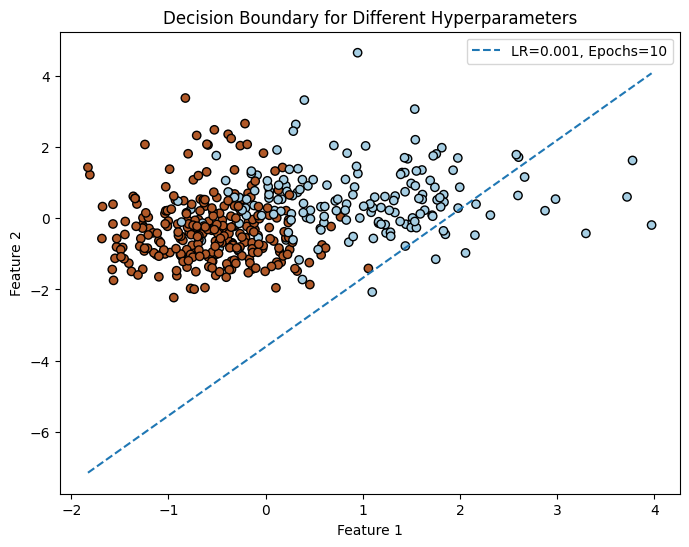

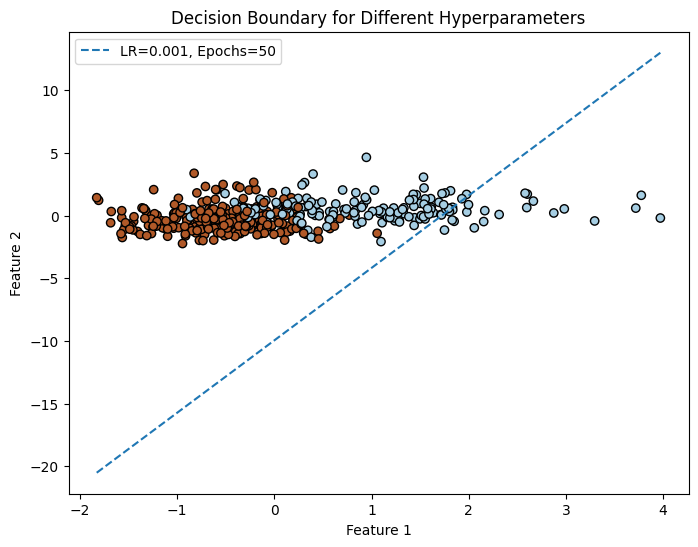

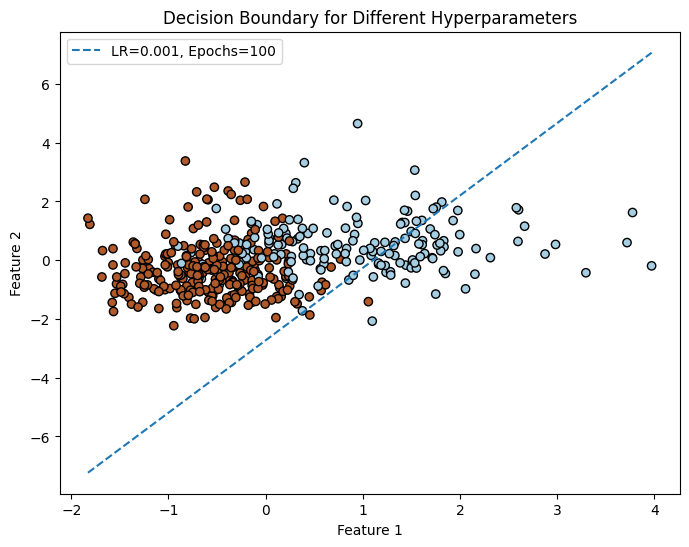

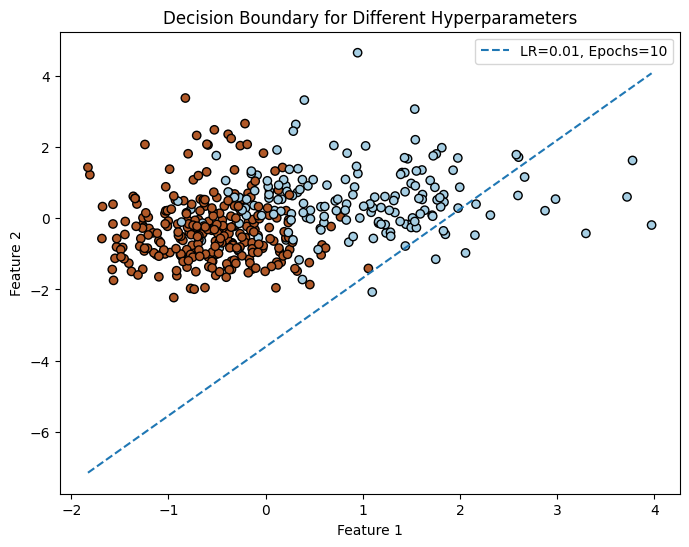

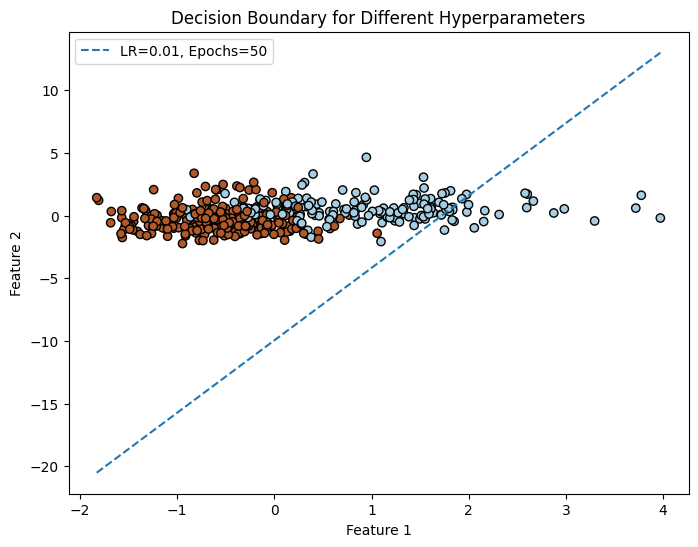

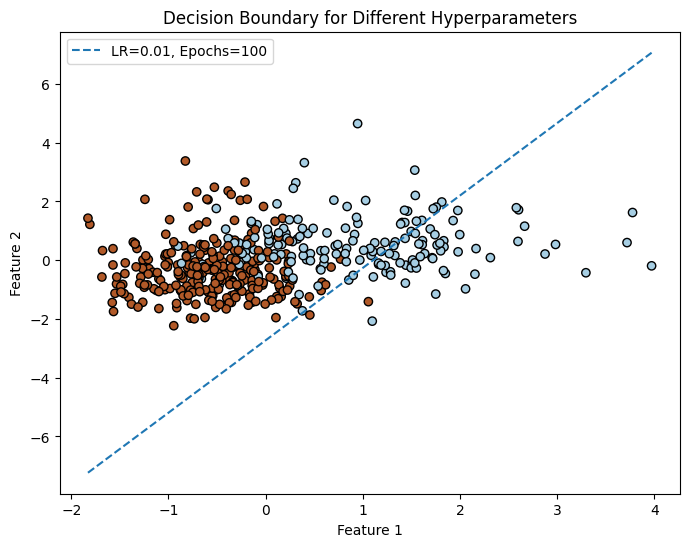

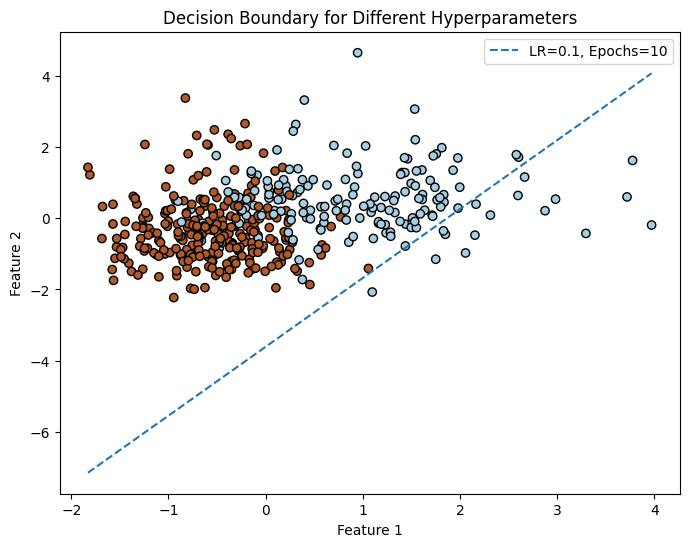

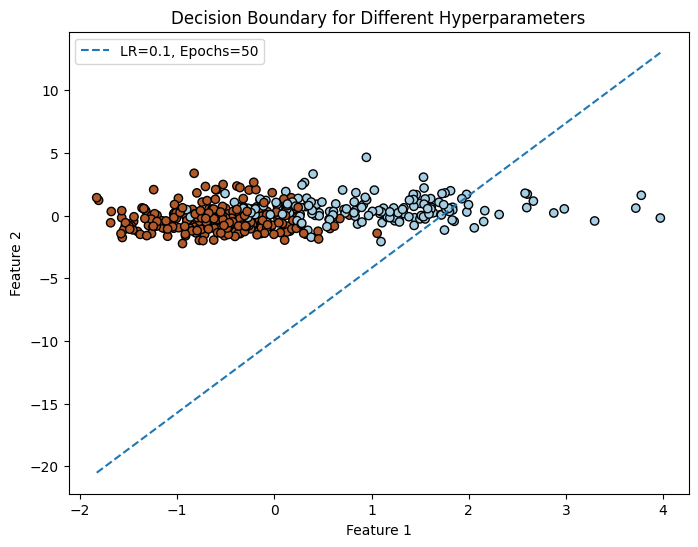

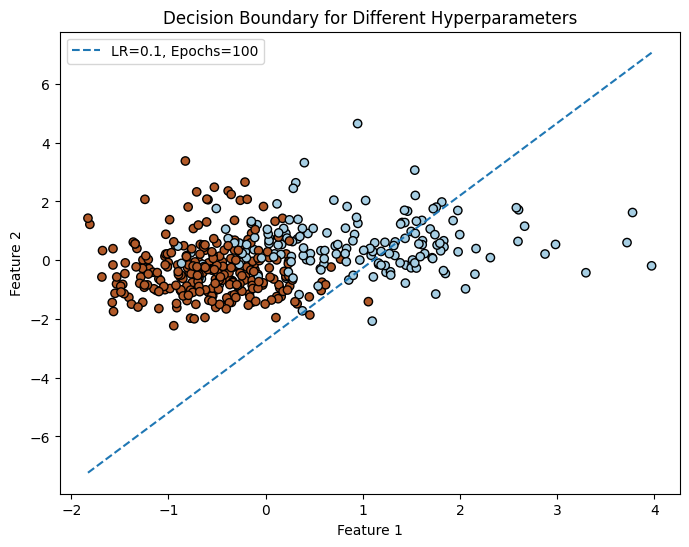

In [32]:
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_epochs': [10, 50, 100]
}

param_combinations = list(ParameterGrid(param_grid))

for i, params in enumerate(param_combinations):
    perceptron = Perceptron(learning_rate=params['learning_rate'], n_epochs=params['n_epochs'])
    perceptron.train(X_train, y_train)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')

    weights, bias = perceptron.weights, perceptron.bias
    slope = -weights[0] / weights[1]
    intercept = -bias / weights[1]
    x_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
    decision_boundary = slope * x_vals + intercept
    plt.plot(x_vals, decision_boundary, linestyle='--', label=f'LR={params["learning_rate"]}, Epochs={params["n_epochs"]}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary for Different Hyperparameters')
    plt.legend()
    plt.show()

Here we are checking the dimensions of x and y train to perform plotting for final decision boundary

In [33]:

print("Shape of X_train:", X_train.shape)
print("Number of dimensions of X_train:", X_train.ndim)

print("Shape of y_train:", y_train.shape)
print("Number of dimensions of y_train:", y_train.ndim)


Shape of X_train: (455, 30)
Number of dimensions of X_train: 2
Shape of y_train: (455,)
Number of dimensions of y_train: 1


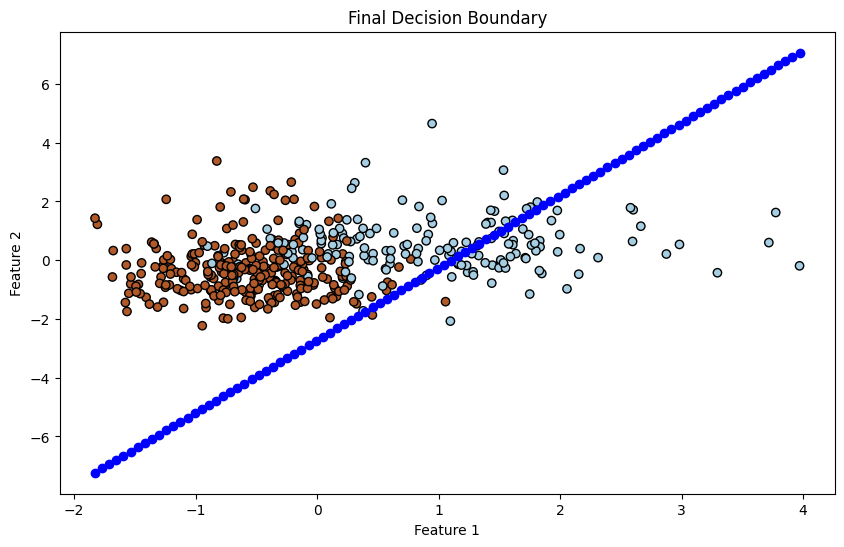

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None
        self.decision_boundary = None

    def train(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_epochs):
            for i in range(n_samples):
                y_pred = self.predict(X_train[i])
                error = y_train[i] - y_pred
                self.weights += self.learning_rate * error * X_train[i]
                self.bias += self.learning_rate * error

        slope = -self.weights[0] / self.weights[1]
        intercept = -self.bias / self.weights[1]
        x_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
        self.decision_boundary = slope * x_vals + intercept

    def predict(self, x):
        linear_output = np.dot(self.weights, x) + self.bias
        return 1 if linear_output >= 0 else -1

    def plot_decision_boundary(self, X_train, y_train, marker='o', color='b'):
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
        plt.plot(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100), self.decision_boundary, linestyle='-', marker=marker, color=color)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Final Decision Boundary')
        plt.show()

perceptron = Perceptron(learning_rate=0.01, n_epochs=100)
perceptron.train(X_train, y_train)
perceptron.plot_decision_boundary(X_train, y_train, marker='o', color='b')


Evaluating the classification report i.e precision, accuracy, F1-score

In [35]:
y_pred = [perceptron.predict(x) for x in X_test]


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.6052631578947368
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00        43
           1       0.72      0.97      0.83        71

    accuracy                           0.61       114
   macro avg       0.24      0.32      0.28       114
weighted avg       0.45      0.61      0.51       114



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Insights:

1. The model performs poorly in predicting classes -1 and 0, with precision, recall, and F1-score of 0.00 for both classes. This indicates that the model may be biased towards predicting class 1 (benign tumors).
2. The precision for class 1 (benign tumors) is relatively high at 0.72, indicating that when the model predicts a sample as belonging to class 1, it is correct approximately 72% of the time.
3. The recall for class 1 is very high at 0.97, indicating that the model correctly identifies approximately 97% of the actual samples belonging to class 1.
4. The F1-score for class 1 is 0.83, which is a harmonic mean of precision and recall and provides a balance between the two metrics.